<a href="https://colab.research.google.com/github/BhavikBuchke/Cisco-Data-science-program/blob/main/Data%20visualization/Longest%20Divers%20Project/longest%20diving%20animals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Ocean's Longest Diving Animals

How long can air-breathing animals hold their breath while diving? Which animals can stay submerged for the longest time?

The file `longest-diving-animals.csv` contains the recorded durations, in minutes, of the longest dives ever recorded in the scientific literature for different species of marine mammals.

In [1]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'longest-diving-animals.csv'.

from google.colab import files
uploaded = files.upload()

Saving longest-diving-animals.csv to longest-diving-animals (1).csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('longest-diving-animals.csv')
df.head()

,animal,category,duration
0,Emperor Penguin,penguins,32.2
1,King Penguin,penguins,9.2
2,Rockhopper Penguin,penguins,3.2
3,Macaroni Penguin,penguins,6.3
4,Royal Penguin,penguins,7.5


### Project Ideas

- Create horizontal bar plots to show the longest diving animals, either for each category or within a category.

- Follow the Pro Tips.

- Convert dive durations from minutes to hours for easier understanding - 2.5 hours is clearer than 150 minutes.

- Add a reference bar to help readers build intuition about the durations.

Side Note: The longest time a person has held their breath underwater is 24 minutes 37 seconds. This was done at the surface of a pool, not while freediving, so it might not directly comparable.


In [3]:
df_penguin = df[df['category'] == 'penguins'].sort_values('duration')
df_penguin['animal'] = df_penguin['animal'].str.replace(' Penguin', '')
df_penguin.head(3)

,animal,category,duration
5,Little,penguins,1.5
6,Yellow-Eyed,penguins,2.2
11,Humboldt,penguins,2.7


In [4]:
def improved_visuals():
  ax = plt.gca()
  ax.spines[['top','right','bottom','left']].set_visible(False)
  ax.tick_params(axis='both', length= 0)
  ax.grid(axis= 'x', alpha= 0.5)

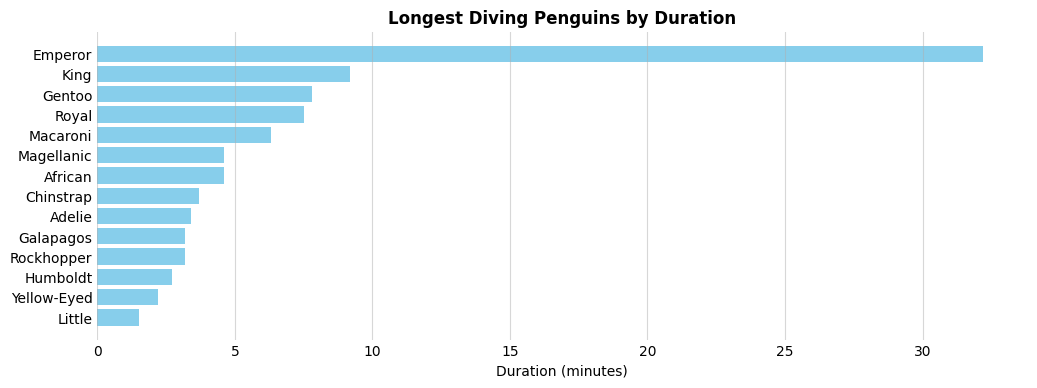

In [5]:
plt.figure(figsize= (12, 4))
plt.barh(df_penguin['animal'], df_penguin['duration'], color= 'skyblue')
plt.xlabel('Duration (minutes)')
plt.title('Longest Diving Penguins by Duration', fontweight= 'bold')
improved_visuals()

In [6]:
person = {'animal': 'longest at surface', 'category':'humans', 'duration': 24.37}
df= pd.concat([df, pd.DataFrame([person])], ignore_index=True).sort_values('duration')
df

,animal,category,duration
21,Northern Fulmar,other seabirds,0.1
46,Nazca Booby,other seabirds,0.1
48,Red-Footed Booby,other seabirds,0.1
17,Streaked Shearwater,other seabirds,0.3
51,Shy Albatross,other seabirds,0.3
...,...,...,...
88,Northern Bottlenose Whale,toothed whales,94.0
67,Weddell Seal,seals,96.0
69,Northern Elephant Seal,seals,119.0
70,Southern Elephant Seal,seals,120.0


In [7]:
df['duration'] = df['duration'].apply(lambda x: x/60).round(2)
df = df.rename(columns= {'duration': 'duration (hours)'})
df

,animal,category,duration (hours)
21,Northern Fulmar,other seabirds,0.00
46,Nazca Booby,other seabirds,0.00
48,Red-Footed Booby,other seabirds,0.00
17,Streaked Shearwater,other seabirds,0.00
51,Shy Albatross,other seabirds,0.00
...,...,...,...
88,Northern Bottlenose Whale,toothed whales,1.57
67,Weddell Seal,seals,1.60
69,Northern Elephant Seal,seals,1.98
70,Southern Elephant Seal,seals,2.00


In [8]:
df_category = df.groupby('category').sum().reset_index()
df_category.sort_values('duration (hours)', inplace= True)
df_category = df_category[df_category['category'] != 'humans']
df_category

,category,animal,duration (hours)
2,other marine mammals,DungongFlorida Manatee,0.57
9,walruses,Atlantic Walrus,0.82
5,sea lions,Australian Sea LionSouthern Sea LionGalapagos ...,0.92
8,turtles,Leatherback Turtle,1.14
3,other seabirds,Northern FulmarNazca BoobyRed-Footed BoobyStre...,1.16
4,penguins,Little PenguinYellow-Eyed PenguinHumboldt Peng...,1.53
0,baleen whales,Antarctic Minke WhaleBryde's WhaleBlue WhaleNo...,2.27
7,toothed whales,Finless PorpoisesPantropical Spotted DolphinHa...,11.25
6,seals,Juan Fernandez Fur SealGuadalupe Fur SealNorth...,11.64


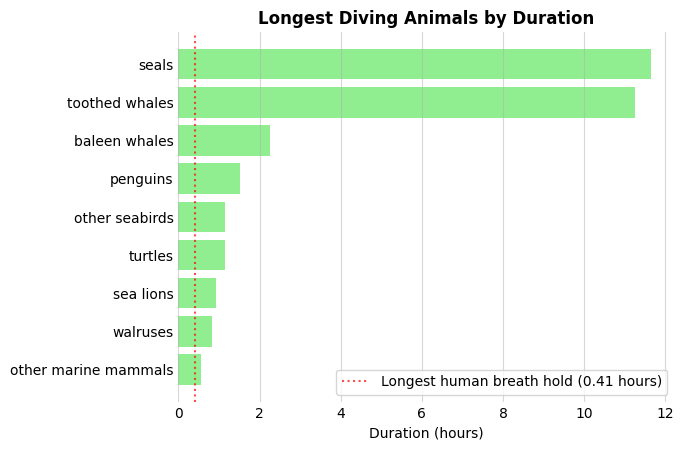

In [9]:
plt.barh(df_category['category'], df_category['duration (hours)'], color= 'lightgreen')
plt.xlabel('Duration (hours)')
plt.title('Longest Diving Animals by Duration', fontweight= 'bold')

human = df[df['animal'] == 'longest at surface']['duration (hours)'].iloc[0]
plt.axvline(x=human, color='red', linestyle=':', alpha= 0.7, label=f'Longest human breath hold ({human:.2f} hours)')
plt.legend()

improved_visuals()